In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.special import logit
from scipy.special import expit
import numpy as np

In [2]:
#Game set-up
p = 0.4
q = 0.2
# Without loss of generality, one can always use higher/lower alpha instead
u = 1 

# Initialization set-up
x_0 = 0.2
y_0 = 0.4

# Number of iterations
t = 40000

# Step size
alpha = 0.05

# list of iterates
xs = [x_0]
ys = [y_0]

# Discrete time update rule min player
def update_x(x,y):
    sigmoid_x = expit(x)
    out_x = 0.8 + 0.2 * sigmoid_x
    der_x = 0.2 * sigmoid_x * (1-sigmoid_x)
    x_new = x - u * alpha * der_x * (expit(y)-q)
    return x_new

# Discrete time update rule max player
def update_y(x,y):
    sigmoid_y = expit(y)
    sigmoid_x = expit(x)
    out_x = 0.8 + 0.2 * sigmoid_x
    der_y = sigmoid_y * (1-sigmoid_y)
    y_new = y + u * alpha * der_y * (out_x -p)
    return y_new

for i in range(t):
    new_x = update_x(xs[-1], ys[-1])
    new_y = update_y(xs[-1], ys[-1])
    xs.append(new_x)
    ys.append(new_y)

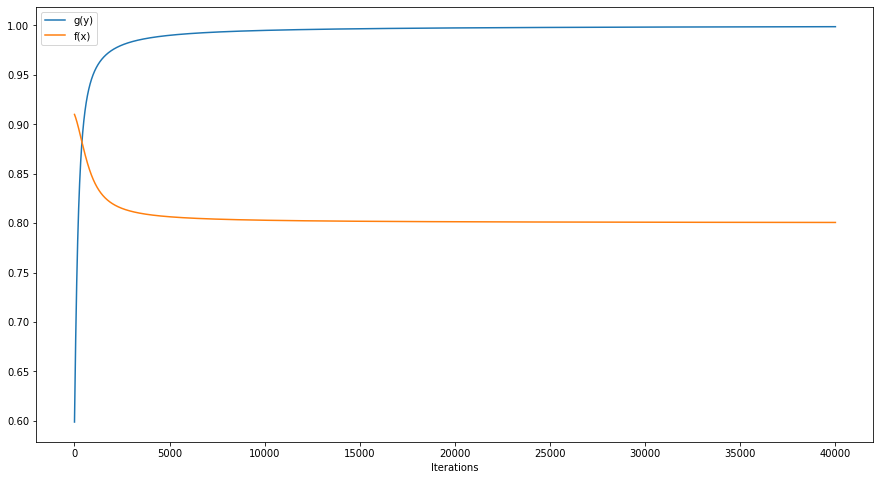

In [3]:
plt.figure(figsize=(15,8))
plt.plot(expit(ys), label = 'g(y)')
plt.plot(0.8 + 0.2 * expit(xs), label = 'f(x)')
plt.legend()
plt.xlabel('Iterations')
plt.savefig('figures/spurious.pdf', bbox_inches = 'tight', dpi = 300)
plt.show()